In [162]:
from torch import nn
import torch

In [163]:
# creating the data
weight = 0.7
bias = 0.3

X = torch.arange(0,1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [164]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [165]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
        
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

In [166]:
torch.manual_seed(42)
modelOne = LinearRegression()

In [167]:
list(modelOne.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [168]:
# set up loss function and optimmizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(modelOne.parameters(), lr = 0.001)

In [169]:
# training
epochs = 1000
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
    modelOne.train()
    y_pred = modelOne(X_train)
    loss = loss_fn(y_pred,y_train)
    print(f"Loss: {loss}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    modelOne.eval()
    with torch.inference_mode():
        test_pred = modelOne(X_test)
        test_loss = loss_fn(test_pred,y_test.type(torch.float))
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        epoch_count.append(epoch)

Loss: 0.31288138031959534
Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4931890368461609 
Loss: 0.3117292523384094
Epoch: 1 | MAE Train Loss: 0.3117292523384094 | MAE Test Loss: 0.4918419420719147 
Loss: 0.3105771541595459
Epoch: 2 | MAE Train Loss: 0.3105771541595459 | MAE Test Loss: 0.49049490690231323 
Loss: 0.3094250559806824
Epoch: 3 | MAE Train Loss: 0.3094250559806824 | MAE Test Loss: 0.48914775252342224 
Loss: 0.30827295780181885
Epoch: 4 | MAE Train Loss: 0.30827295780181885 | MAE Test Loss: 0.4878006875514984 
Loss: 0.3071208596229553
Epoch: 5 | MAE Train Loss: 0.3071208596229553 | MAE Test Loss: 0.4864535331726074 
Loss: 0.3059687614440918
Epoch: 6 | MAE Train Loss: 0.3059687614440918 | MAE Test Loss: 0.4851064682006836 
Loss: 0.3048166334629059
Epoch: 7 | MAE Train Loss: 0.3048166334629059 | MAE Test Loss: 0.48375946283340454 
Loss: 0.30366456508636475
Epoch: 8 | MAE Train Loss: 0.30366456508636475 | MAE Test Loss: 0.48241233825683594 
Loss: 0.3025124669

In [170]:
modelOne.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

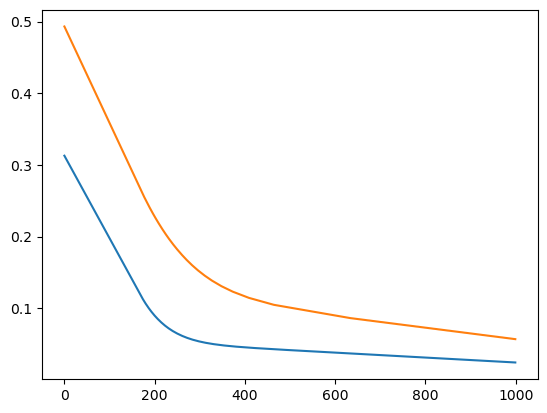

In [172]:
# Plot loss curves
import matplotlib.pyplot as plt

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")